<a href="https://colab.research.google.com/github/Khaled-844AI/My-first-CNN-Image-Classifier-Happy-Sad-People/blob/main/Image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import tensorflow as tf
import os
import matplotlib as plt

In [47]:
device_name = tf.test.gpu_device_name()
print(device_name)

/device:GPU:0


In [48]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu , True)

In [49]:
import cv2
import imghdr

In [50]:
data_dir = 'drive/MyDrive/data'
image_exts = ['jpg' , 'jpeg' , 'bmp' , 'png']

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
from matplotlib import pyplot as plt
os.listdir(data_dir)


['sad', 'happy']

In [53]:
img = cv2.imread(os.path.join('drive/MyDrive/data' , 'happy' , '05-12-21-happy-people.jpg'))
img.shape

(880, 1400, 3)

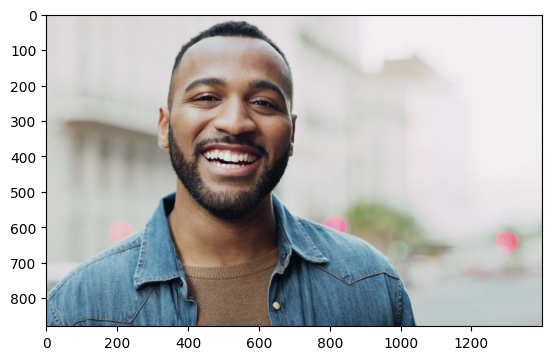

In [54]:
plt.imshow(cv2.cvtColor(img , cv2.COLOR_BGR2RGB))

In [55]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list drive/MyDrive/data/sad/depositphotos_4584891-stock-photo-sad-man-in-a-empty.jpg
Image not in ext list drive/MyDrive/data/sad/depositphotos_210655610-stock-photo-sad-man-sitting-floor-home.jpg
Image not in ext list drive/MyDrive/data/sad/n-girl-behind-parties-people-social-depression-mental-burnout-and-2119027427.jpg
Image not in ext list drive/MyDrive/data/sad/sad-person-pictures-2bnso9uiwlhrikrx.jpg
Image not in ext list drive/MyDrive/data/sad/sad-person-pictures-2560-x-1707-a8ginomrbkhyh3ri.jpg
Image not in ext list drive/MyDrive/data/sad/very-sad-man-sitting-alone-on-white-background-depressed-young-man-sitting-businessman-vector.jpg
Image not in ext list drive/MyDrive/data/sad/origin-144.jpg
Image not in ext list drive/MyDrive/data/sad/depositphotos_307820740-stock-photo-silhouette-of-depressed-man-sitting.jpg
Image not in ext list drive/MyDrive/data/sad/lated-on-yellow-background-sad-serious-face-feeling-miserable-and-2135372687.jpg
Image not in ext list driv

In [56]:
import numpy as np

data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 384 files belonging to 2 classes.


In [57]:
data_iterator = data.as_numpy_iterator()

In [58]:
batch = data_iterator.next()

In [59]:
batch

(array([[[[204.08722  , 205.08722  , 209.08722  ],
          [207.69922  , 208.69922  , 212.69922  ],
          [203.4194   , 204.4194   , 208.4194   ],
          ...,
          [253.38672  , 254.61328  , 252.77344  ],
          [254.       , 254.       , 254.       ],
          [254.       , 254.       , 254.       ]],
 
         [[205.2207   , 206.2207   , 210.2207   ],
          [204.59985  , 205.59985  , 209.59985  ],
          [204.7832   , 205.7832   , 209.7832   ],
          ...,
          [253.38672  , 254.61328  , 252.77344  ],
          [254.       , 254.       , 254.       ],
          [254.       , 254.       , 254.       ]],
 
         [[205.15039  , 206.15039  , 210.15039  ],
          [204.23633  , 205.23633  , 209.23633  ],
          [206.22656  , 207.22656  , 211.22656  ],
          ...,
          [253.38672  , 254.61328  , 252.77344  ],
          [254.       , 254.       , 254.       ],
          [254.       , 254.       , 254.       ]],
 
         ...,
 
         [[1

In [60]:
batch[0].shape

(32, 256, 256, 3)

In [61]:
batch[1]

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0], dtype=int32)

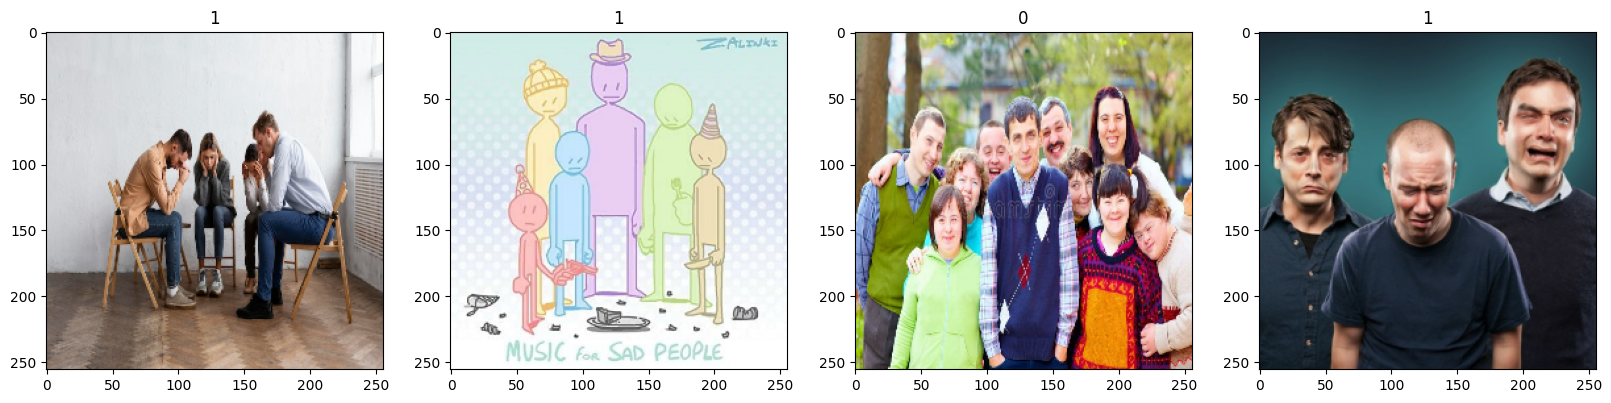

In [62]:
fig , ax = plt.subplots(ncols = 4 , figsize=(20,20))

for idx , img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [63]:
data = data.map(lambda x, y: (x/255 , y))

In [64]:

len(data)

12

In [65]:
scaled_iterator = data.as_numpy_iterator()

In [66]:
batch = scaled_iterator.next()

In [67]:
batch[0].max()

1.0

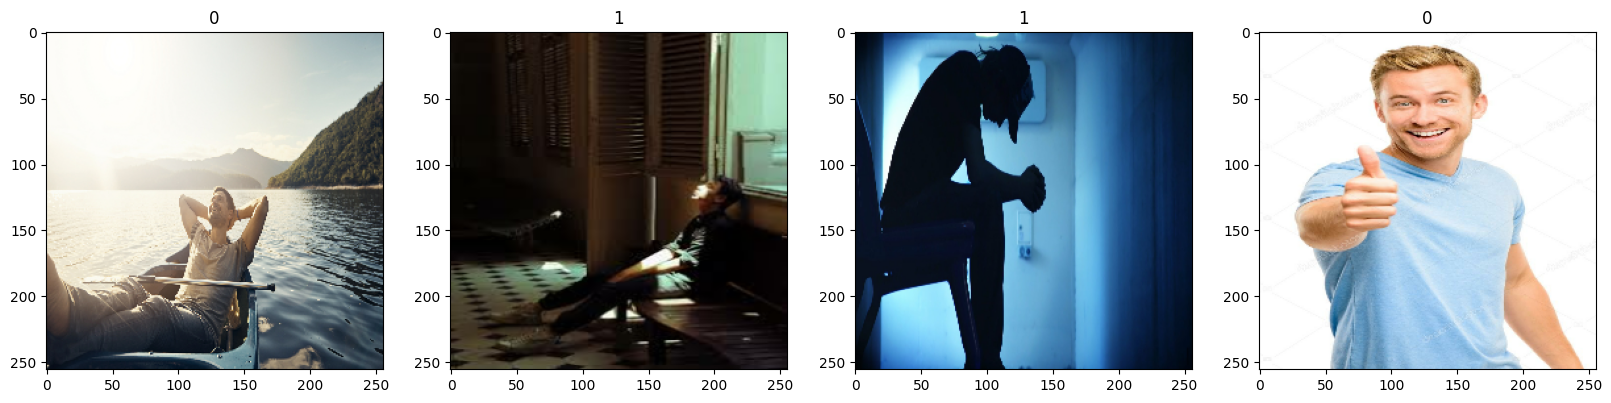

In [68]:
fig , ax = plt.subplots(ncols = 4 , figsize=(20,20))

for idx , img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [69]:
len(data) # 7 batches

12

In [70]:
train_size = int(len(data)*.7)
cv_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [71]:
train_size , cv_size , test_size # = 7 all the batches

(8, 3, 2)

In [72]:
train = data.take(train_size)
cv = data.skip(train_size).take(cv_size)
test = data.skip(train_size + cv_size).take(test_size)


In [120]:
len(train)

8

In [74]:
import tensorflow

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [76]:
model = Sequential()

In [77]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [78]:
model.compile('adam' , loss = tf.keras.losses.BinaryCrossentropy() , metrics = ['accuracy'])

In [79]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

In [80]:
logdir = 'drive/MyDrive/data/logs'

In [81]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [122]:
his = model.fit(train , epochs = 1 , validation_data=cv , callbacks=[tensorboard_callback])

8/8 [==============================] - 18s 2s/step - loss: 0.0118 - accuracy: 1.0000 - val_loss: 0.0211 - val_accuracy: 0.9896


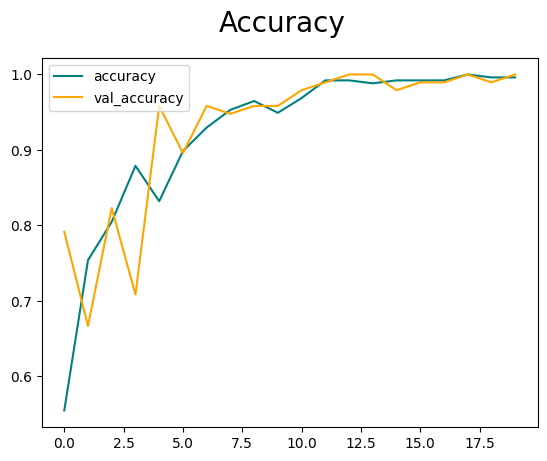

In [83]:

fig = plt.figure()
plt.plot(his.history['accuracy'], color='teal', label='accuracy')
plt.plot(his.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

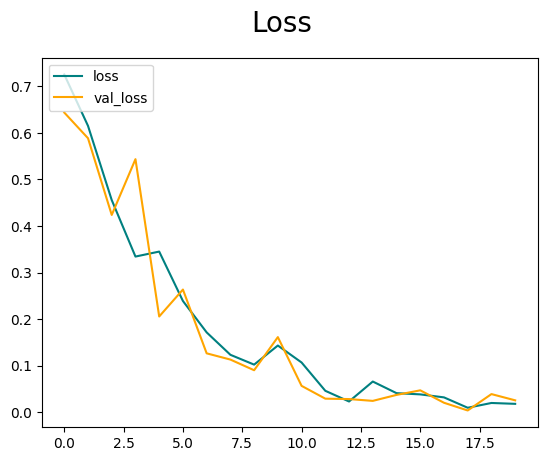

In [84]:
fig = plt.figure()
plt.plot(his.history['loss'], color='teal', label='loss')
plt.plot(his.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [85]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [86]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [118]:
len(test)

1

In [123]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 31ms/step


In [124]:
print(pre.result().numpy(), re.result().numpy(), acc.result().numpy())

1.0 0.972973 0.984375


In [90]:
import cv2

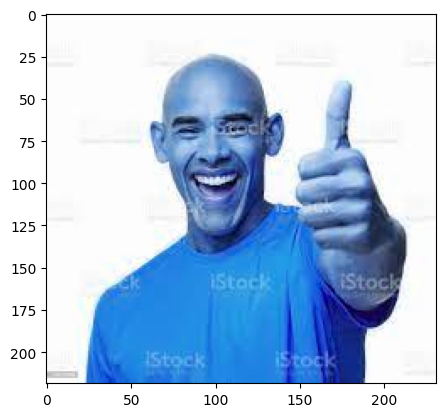

In [132]:
img = cv2.imread('drive/MyDrive/data/happy-man-2.jpg')
plt.imshow(img)
plt.show()

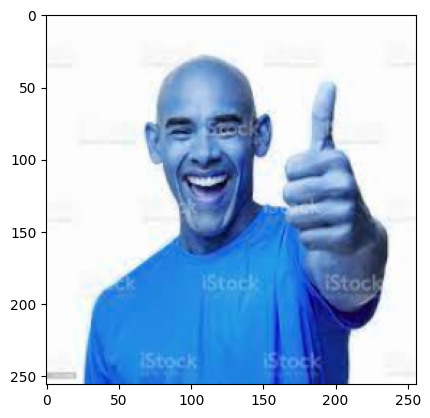

In [133]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [134]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 19ms/step


In [135]:
yhat

array([[0.00437619]], dtype=float32)

In [136]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


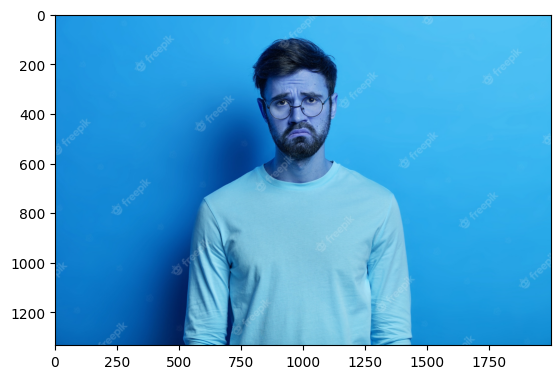

In [137]:
img = cv2.imread('drive/MyDrive/sad_person.jpg')
plt.imshow(img)
plt.show()

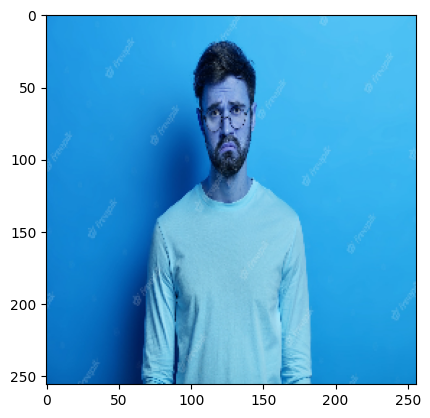

In [104]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [105]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 18ms/step


In [138]:
yhat

array([[0.00437619]], dtype=float32)

In [139]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [140]:
from tensorflow.keras.models import load_model

In [142]:
model.save(os.path.join('drive/MyDrive/models','imageclassifier.h5'))

In [144]:
new_model = load_model('drive/MyDrive/models/imageclassifier.h5')

In [145]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 75ms/step


array([[0.00437619]], dtype=float32)